# K-Means

## Objectif

Répartir N données en k groupes disjoints, avec k inconnu a priori, en minimisant la somme des inerties intra-classes.

$$
\left.\begin{matrix}
inertie & = & \frac {1} {n} \sum d^2(e_i, g) \\
        & = & \underbrace{\frac {1} {n} \sum_{i=1}^k n_i d^2(g_i, g)}_{inertie\ interclasse} 
            + \underbrace{\frac {1} {n} \sum_{i=1}^k \sum_{e \in G_i} d^2(e, g_i)}_{inertie\ intraclasse} \\
\end{matrix}\right.
$$

## Algorithmes

### Centres mobiles

 0. Initialisation des k centres (positions aléatoires)
 1. Affectation des données au groupe du centre le plus proche
 2. Recalcul et replacement du centre 
 3. Reprendre à l'étape 1 jusquà dépassement de la condition (nombre d'itérations max atteinte, variations de l'inertie inter/intra faible ($\le \epsilon$)

### K-Means

 - Variante stochastique, online
 - A chaque itération, choisir une seule donnée aléatoirement. Si elle change de groupe, on recalcule les centres

### K-Means++

Lors de l'initialisation des centres, il est possible d'avoir des centres proches.

Pour éviter cela, à l'intialisation, K-Means++ positionne les centres les uns après les autres suivant une loi uniforme qui privilégie les candidats éloignés des centres déjà existants.

Cette méthode permet de créer des centres éloignés les uns des autres tout en les plaçant proches des données denses.

### K-Medoïd

Traiter des données quelconques (non vectorielles) pour lesquelles une métrique existe

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, jaccard_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [2]:
data = load_iris()
features = data['feature_names']
nb_features = len(features)
raw_data = data['data']
targets = data['target']
markers = ['o', 'x', '*']
len(data['data']), features

(150,
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [3]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, init='k-means++', n_init='auto')
y_pred = kmeans.fit_predict(data['data'])

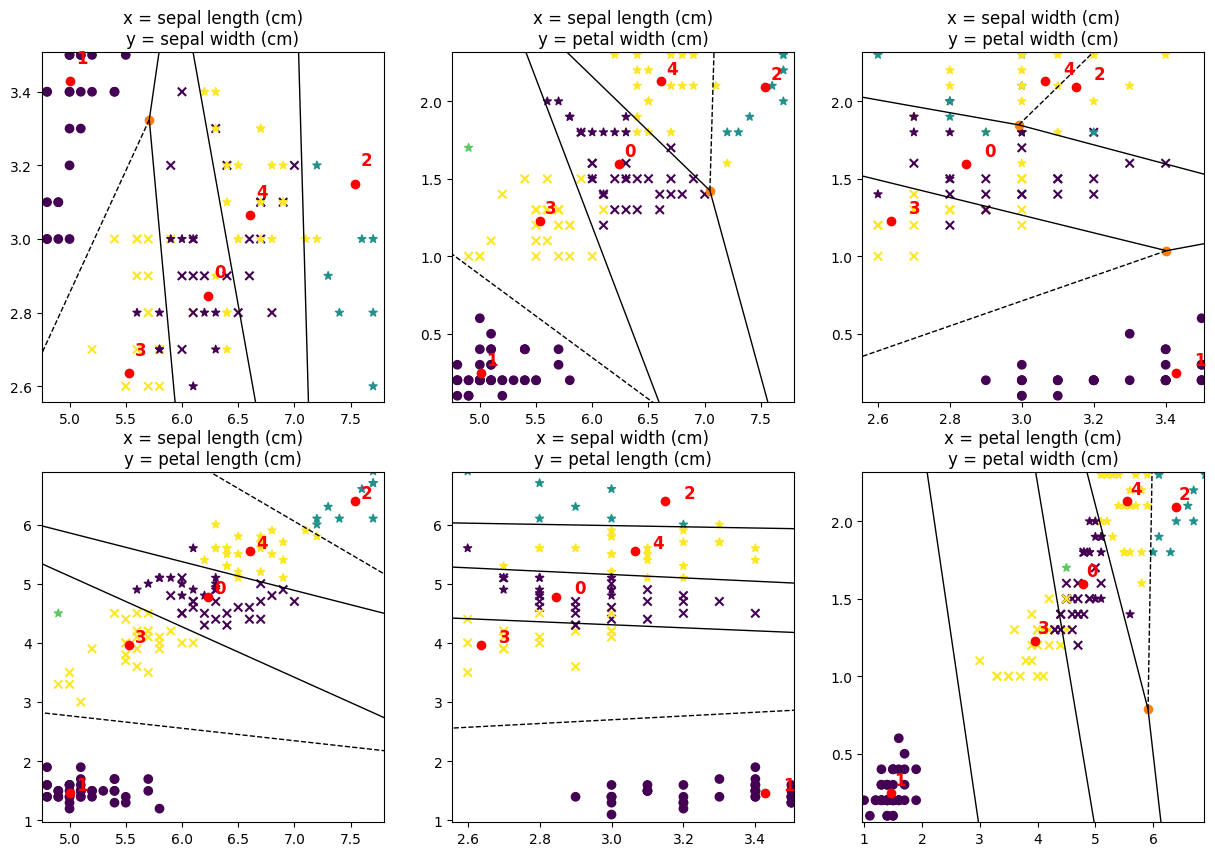

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

current = 0
for i in range(nb_features - 1):
    for j in range(i + 1, nb_features):
        current_plot = ax[current % 2, current // 2]
        for m in range(len(markers)):
            current_plot.scatter(x = raw_data[:,i][targets==m], y = raw_data[:,j][targets==m], c = y_pred[targets==m], marker=markers[m])
        current_plot.set_title(f"x = {features[i]}\ny = {features[j]}")
        vor = Voronoi(kmeans.cluster_centers_[:, [i,j]])
        voronoi_plot_2d(vor, ax=current_plot)
        for k in range(n_clusters):
            current_plot.plot(kmeans.cluster_centers_[k, i], kmeans.cluster_centers_[k, j], 'ro')
            current_plot.text(kmeans.cluster_centers_[k, i] + 0.05, kmeans.cluster_centers_[k, j] + 0.05, f"{k}",
                                  color='r', size='large', weight='bold')
        current = current + 1

# Qualité du clustering

  - Inertie et méthode du coude (point d'inflexion de l'inertie en fonction du nombre de clusters).
  - Silhouette. Il varie entre -1 et 1. A un coefficient proche de 1 signifie que l'instance est bien positionnée dans son cluster et loin des autres.
  - Cohérence entre classifications

Text(0.5, 1.0, 'Jaccard score')

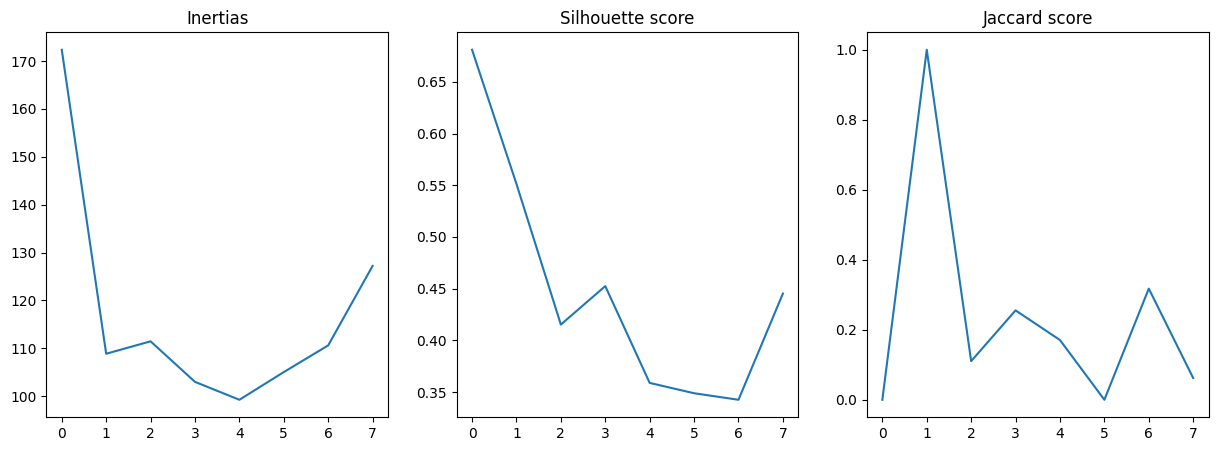

In [25]:
inertias = []
silhouettes = []
jaccards = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init='auto')
    _ = kmeans.fit_predict(raw_data)
    inertias.append(kmeans.inertia_ + 10*i)
    silhouettes.append(silhouette_score(raw_data, kmeans.labels_))
    kmeans_bis = KMeans(n_clusters = i, init='k-means++', n_init='auto')
    _ = kmeans_bis.fit_predict(raw_data)
    jaccards.append(jaccard_score(kmeans.labels_, kmeans_bis.labels_, average='binary' if i == 2 else 'macro'))
    
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(inertias)
ax[0].set_title("Inertias")
ax[1].plot(silhouettes)
ax[1].set_title("Silhouette score")
ax[2].plot(jaccards)
ax[2].set_title("Jaccard score")